In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Randomness

Let's briefly review the principles of randomness we discussed last week.

In [2]:
#Randomly Take a Value From a List
np.random.choice(['a', 'b', 'c'])

'c'

In [3]:
#Randomly Take an Integer in Range of Numbers
np.random.randint(1,5)

2

In [4]:
#Randomly Take a Float Value in a Range of Numbers
np.random.uniform(0,2)

0.6340430984849676

We can also use the 'size' argument in any of these functions to return more than one result

In [5]:
np.random.uniform(0,2, size=3)

array([0.89089627, 1.3770145 , 0.3952496 ])

What if we want to make reproducible code that uses a 'random' function? We can use the 'np.random.seed' function so that our 'random' value will be the same every time.  

**Note that in order for this to work in Jupyter Notebook, you need to run it in the same cell as your random code. If you are running multiple random functions that you want to be re-producible, you need to put this line of code in every cell that has a random function!!**

In [6]:
np.random.seed(42)

Below, we can our results when we randomly draw a float value between 0 and 2 10,000 times.

(array([ 998.,  944., 1029., 1018.,  989.,  995., 1072.,  994.,  972.,
         989.]),
 array([9.62477886e-05, 2.00066818e-01, 4.00037389e-01, 6.00007960e-01,
        7.99978530e-01, 9.99949101e-01, 1.19991967e+00, 1.39989024e+00,
        1.59986081e+00, 1.79983138e+00, 1.99980195e+00]),
 <a list of 10 Patch objects>)

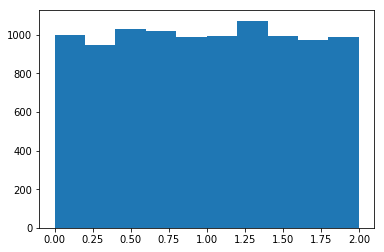

In [9]:
plt.hist(np.random.uniform(0,2, size=10000))

## Bernoulli Distribution

The Bernoulli distribution is equivalent to flipping a coin. We could simulate this by picking a random value between 0 and 1 and saying that anything above 0.5 is a 'head' and anything below 0.5 is a 'tail'.

In [11]:
np.random.random()

0.4592924535341931

Let's say we wanted to "flip 100 coins" using this method.

(array([51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

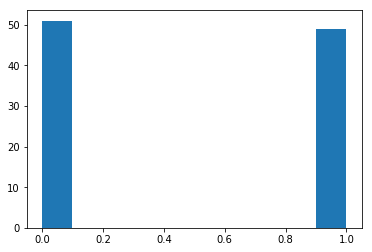

In [14]:
#Note that last week I was using the 'append' function to add to our list of simulated trials, but the below is actually better practice.
random_numbers = np.empty(100)
for i in range(100):
    x = np.random.random()
    if x >= 0.5:
        random_numbers[i] = 1
    else:
        random_numbers[i] = 0
plt.hist(random_numbers)

This is nice to play around with, but we can also use the 'Scipy.Stats' module to create a simulation.

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

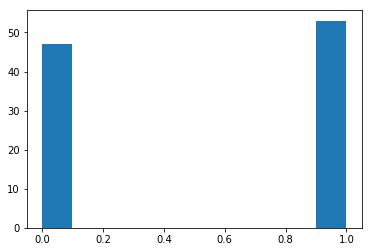

In [18]:
dist = stats.bernoulli(0.5)
random_numbers = dist.rvs(size=100)
plt.hist(random_numbers)

The module also has all of the vital information regarding the distribution.

In [19]:
#Mean
dist.mean()

0.5

In [20]:
#Variance
dist.var()

0.25

In [21]:
#PMF of 0
dist.pmf(0)

0.5

In [22]:
#PMF of 1
dist.pmf(1)

0.5

In [23]:
#CDF of 0
dist.cdf(0)

0.5

In [24]:
#CDF of 1
dist.cdf(1)

1.0

## Binomial Distribution

Let's look at binomial distribution, like flipping 100 coins!

In [25]:
dist = stats.binom(n=100, p=0.5)

Below is the result of how many heads we could get if we flipped 100 coins 100 times.

In [26]:
dist.rvs(size=100)

array([49, 34, 52, 54, 50, 47, 59, 52, 45, 53, 47, 48, 47, 46, 46, 47, 56,
       52, 59, 47, 49, 53, 49, 45, 55, 47, 54, 49, 47, 54, 55, 54, 54, 59,
       42, 55, 49, 51, 54, 44, 53, 48, 43, 53, 48, 51, 50, 60, 38, 57, 47,
       44, 46, 49, 57, 51, 52, 53, 52, 50, 61, 51, 48, 55, 56, 46, 57, 47,
       49, 47, 48, 39, 47, 49, 51, 51, 47, 55, 54, 56, 52, 59, 51, 53, 51,
       47, 49, 55, 56, 61, 48, 60, 44, 53, 49, 54, 63, 46, 55, 48])

(array([ 2.,  2., 14., 17., 15., 21., 12., 11.,  4.,  2.]),
 array([38. , 40.4, 42.8, 45.2, 47.6, 50. , 52.4, 54.8, 57.2, 59.6, 62. ]),
 <a list of 10 Patch objects>)

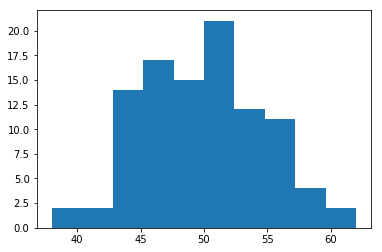

In [27]:
plt.hist(dist.rvs(size=100))

In [28]:
#Mean
dist.mean()

50.0

In [29]:
#Variance
dist.var()

25.0

In [30]:
#PMF of 50
dist.pmf(50)

0.07958923738717888

In [31]:
#CDF of 50
dist.cdf(50)

0.5397946186935897

In [32]:
#Manual Recreation of a CDF
x = 0
for i in range(51):
    x += dist.pmf(i)
x

0.5397946186935751

Say we have only 3 trials instead of 100 - we can plot the different PMF values for each different number of successes.

(array([0.125, 0.   , 0.   , 0.375, 0.   , 0.   , 0.375, 0.   , 0.   ,
        0.125]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

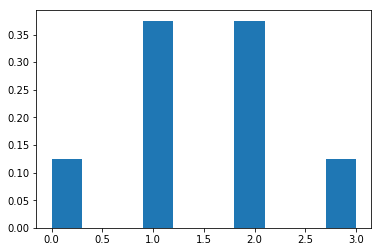

In [33]:
values = np.array([])
pmf_values = np.array([])
for i in range(4):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.binom.pmf(n=3, p=0.5, k=i))
plt.hist(values, weights=pmf_values)

## An Aside: Creating Nicer Plots in Matplotlib

Now is as good a time as any to learn a few more things about how to make better visualizations in Python with Matplotlib. We briefly covered some of this in Week 2.

First, we can put in a line of code to make our plot bigger. We can use the 'figsize' argument to put in a custom size for the height and width of our graph.

(array([0.125, 0.   , 0.   , 0.375, 0.   , 0.   , 0.375, 0.   , 0.   ,
        0.125]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

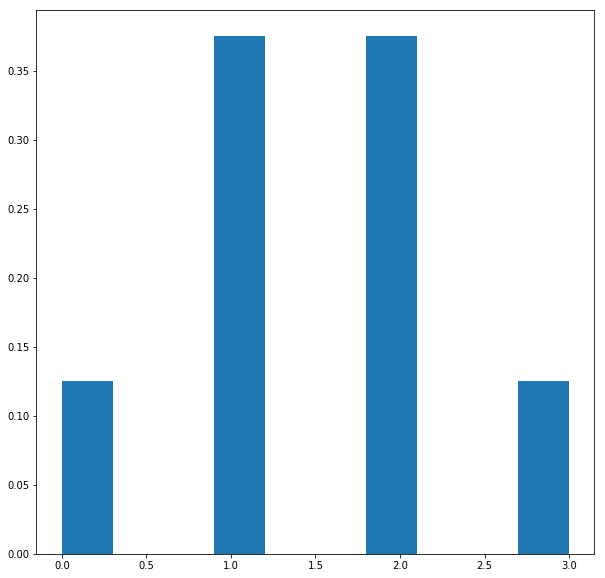

In [34]:
#Plot a Histogram - The Fig Line is to Make the Graph Bigger
fig = plt.figure(figsize=(10,10))
plt.hist(values, weights=pmf_values)

Now we can customize the ticks along the x axis

(array([0.125, 0.   , 0.   , 0.375, 0.   , 0.   , 0.375, 0.   , 0.   ,
        0.125]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

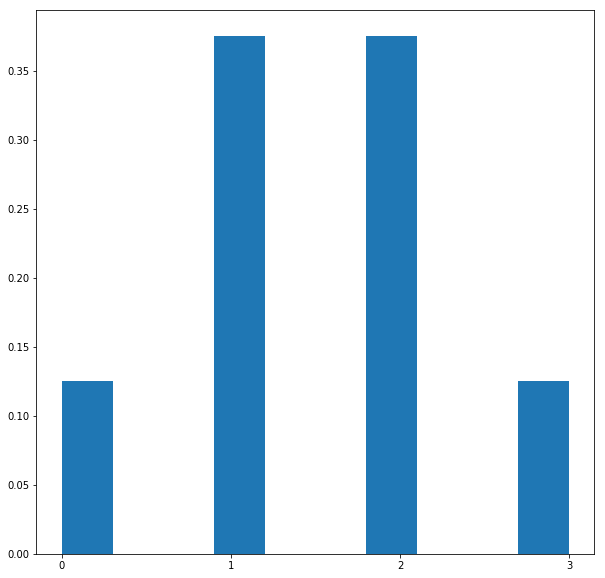

In [35]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.hist(values, weights=pmf_values)

We can add a title...

Text(0.5, 0.92, 'PMFs for 3 Coin Flips')

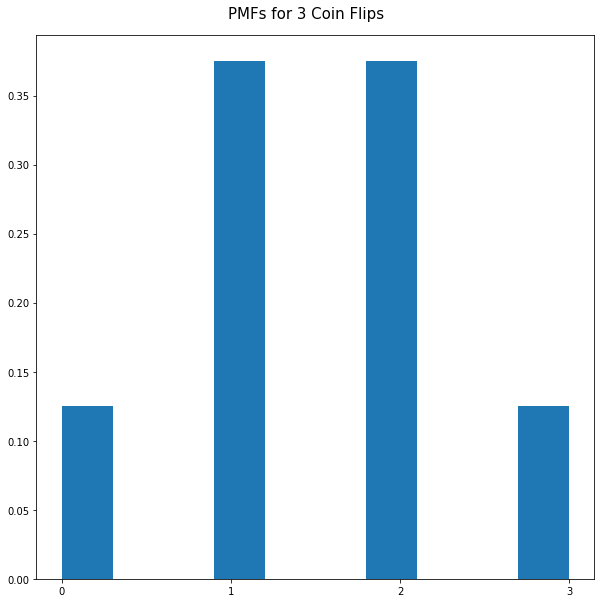

In [36]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.hist(values, weights=pmf_values)
fig.suptitle('PMFs for 3 Coin Flips', fontsize=15, y=0.92)

And labels for our X and Y axises:

Text(0.5, 0.92, 'PMFs for 3 Coin Flips')

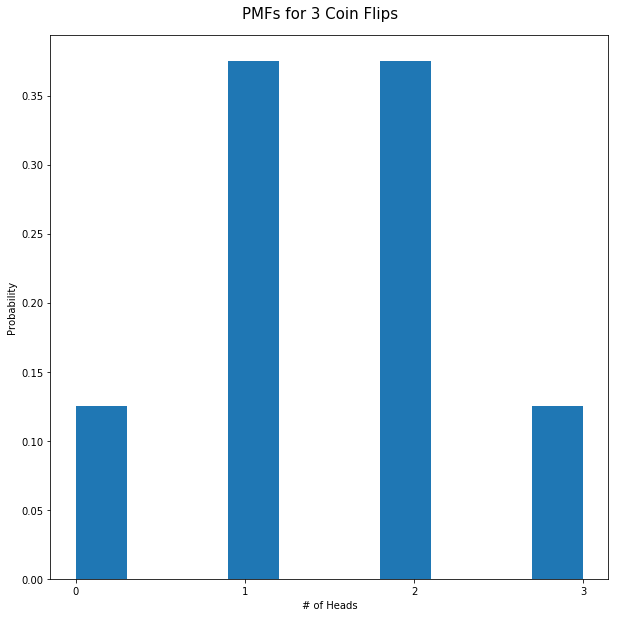

In [37]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.hist(values, weights=pmf_values)
plt.xlabel('# of Heads')
plt.ylabel('Probability')
fig.suptitle('PMFs for 3 Coin Flips', fontsize=15, y=0.92)

Having a title and X and Y labels are **required** for any visualizations submitted for your project.

### Back to Binomial

Below is a CDF plot for the different values in 3 trials.

In [38]:
values = np.array([])
cdf_values = np.array([])
for i in range(4):
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.binom.cdf(n=3, p=0.5, k=i))

You can use either a bar graph or line graph to plot a CDF, but a line graph makes more sense.

Text(0.5, 0.92, 'CDFs for 3 Coin Flips')

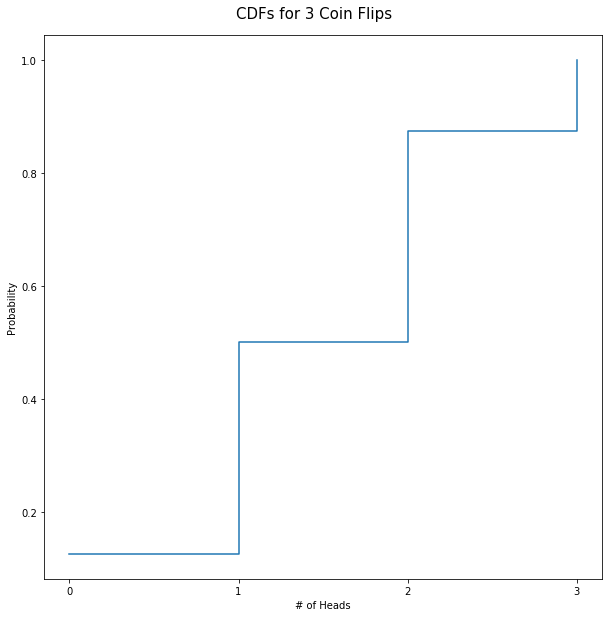

In [39]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Heads')
plt.ylabel('Probability')
fig.suptitle('CDFs for 3 Coin Flips', fontsize=15, y=0.92)

## Geometric Distribution

We can also simulate a geometric distribution to see how many coins we will need to flip to get our first heads.

In [40]:
dist = stats.geom(0.5)

In [41]:
dist.mean()

2.0

In [42]:
dist.var()

2.0

In [43]:
dist.pmf(1)

0.5

In [44]:
dist.pmf(2)

0.25

In [45]:
dist.pmf(3)

0.125

In [46]:
dist.cdf(3)

0.875

In [47]:
values = np.array([])
pmf_values = np.array([])
#Why is the minimum one here?
for i in range(1,6):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.geom.pmf(p=0.5, k=i))

Text(0.5, 0.92, 'PMFs for 5 Coin Flips')

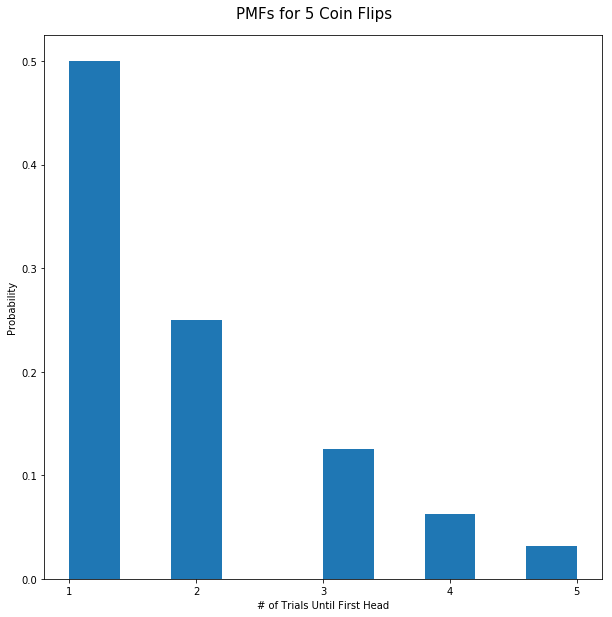

In [48]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(1,6))
plt.hist(values, weights=pmf_values)
plt.xlabel('# of Trials Until First Head')
plt.ylabel('Probability')
fig.suptitle('PMFs for 5 Coin Flips', fontsize=15, y=0.92)

In [49]:
values = np.array([])
cdf_values = np.array([])
for i in range(1,6):
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.geom.cdf(p=0.5, k=i))

Text(0.5, 0.92, 'CDFs for 5 Coin Flips')

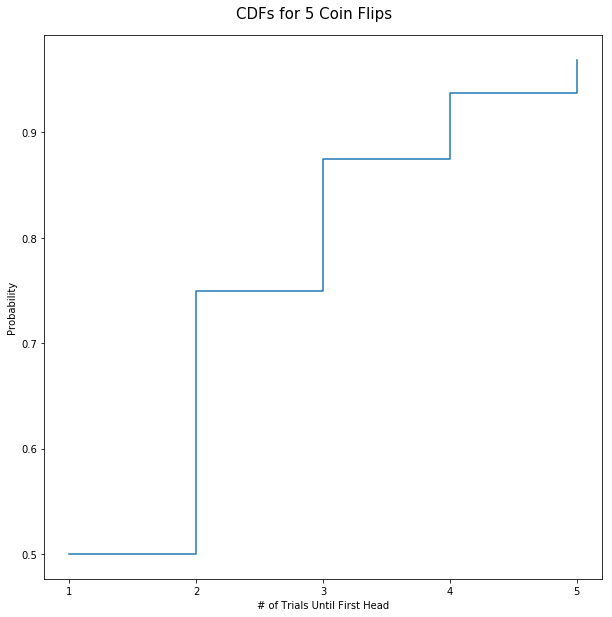

In [50]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(1,6))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Trials Until First Head')
plt.ylabel('Probability')
fig.suptitle('CDFs for 5 Coin Flips', fontsize=15, y=0.92)

## Poisson Distribution

Say, on average, 2 trains arrive every ten minutes at the 145th Street A stop.

In [51]:
dist = stats.poisson(2)

In [52]:
dist.mean()

2.0

In [53]:
dist.var()

2.0

In [54]:
values = np.array([])
pmf_values = np.array([])
for i in range(10):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.poisson.pmf(mu=2, k=i))

Text(0.5, 0.92, 'PMFs for # of Trains That Will Arrive in a 10-Minute Window')

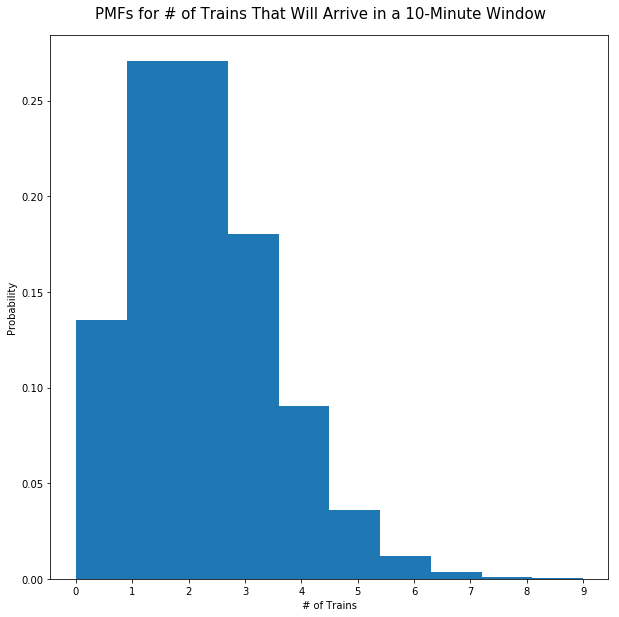

In [55]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(10))
plt.hist(values, weights=pmf_values)
plt.xlabel('# of Trains')
plt.ylabel('Probability')
fig.suptitle('PMFs for # of Trains That Will Arrive in a 10-Minute Window', fontsize=15, y=0.92)

In [56]:
values = np.array([])
cdf_values = np.array([])
for i in range(10):
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.poisson.cdf(mu=2, k=i))

Text(0.5, 0.92, 'PMFs for # of Trains That Will Arrive in a 10-Minute Window')

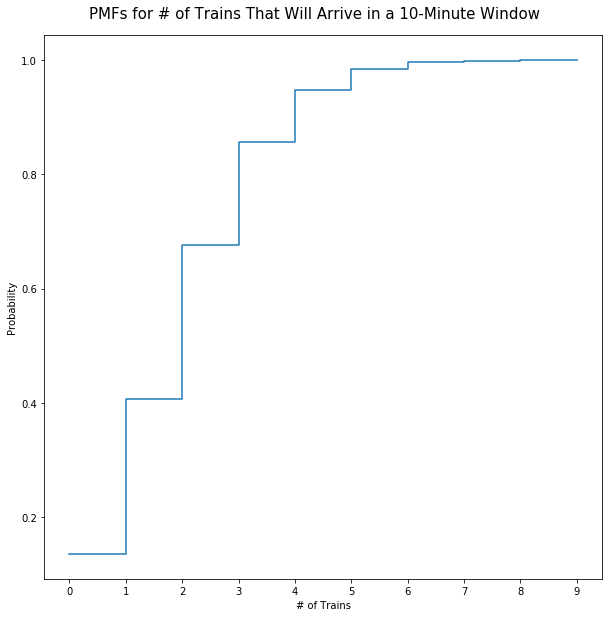

In [57]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(10))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Trains')
plt.ylabel('Probability')
fig.suptitle('PMFs for # of Trains That Will Arrive in a 10-Minute Window', fontsize=15, y=0.92)

As we mentioned in class, the Poisson distribution can be used as an approximation to the binomial distribution when there are a high number of trials (n > 100) and a low probability (p < 0.05). Let's see if this works out!

Let's look at a binomial function with 100 trials and a 0.01 probability of success per trial and examine the PMF values for 0-4 through both the binomial function and the Poisson function. In this case, the Poisson function will have a Lambda of 1 (100 * 0.01 = 1)

In [4]:
[stats.binom.pmf(p=0.01, n=100, k=i) for i in range(5)]

[0.3660323412732295,
 0.36972963764971983,
 0.18486481882486308,
 0.060999165807528455,
 0.014941714856894668]

In [4]:
[stats.poisson.pmf(mu=1, k=i) for i in range(5)]

[0.36787944117144233,
 0.36787944117144233,
 0.18393972058572114,
 0.06131324019524039,
 0.015328310048810101]

Quite close!

## Discrete Distributions

We can also build a custom distribution, such as the results of rolling two dice which we covered in class.

In [60]:
two_dice = np.array([])
for i in range(1,7):
    for j in range(1,7):
        two_dice = np.append(two_dice, i + j)

In [61]:
two_dice

array([ 2.,  3.,  4.,  5.,  6.,  7.,  3.,  4.,  5.,  6.,  7.,  8.,  4.,
        5.,  6.,  7.,  8.,  9.,  5.,  6.,  7.,  8.,  9., 10.,  6.,  7.,
        8.,  9., 10., 11.,  7.,  8.,  9., 10., 11., 12.])

In [62]:
len(two_dice)

36

Similar to the code we used for Monty Hall last week, we can use the 'np.unique' function to see the unique results in our output, as well as the number of times they occur. As a reminder, this code takes all the unique values found in our answer and gives us a raw count of how many times each value occurs in our array.

In [63]:
np.transpose(np.unique(two_dice, return_counts=True))

array([[ 2.,  1.],
       [ 3.,  2.],
       [ 4.,  3.],
       [ 5.,  4.],
       [ 6.,  5.],
       [ 7.,  6.],
       [ 8.,  5.],
       [ 9.,  4.],
       [10.,  3.],
       [11.,  2.],
       [12.,  1.]])

Transposing it is good for visualization purposes, but let's look at the actual output, two arrays - one with the unique results of two dice rolls and one with the respective counts for each of those results.

In [64]:
np.unique(two_dice, return_counts=True)

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]))

We can then assign these two arrays to variables.

In [65]:
two_dice_unique, counts = np.unique(two_dice, return_counts=True)

In [66]:
two_dice_unique

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [67]:
counts

array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

We can see that the sum of the 'counts' variable is equal to the total sample space.

In [68]:
np.sum(counts)

36

Below we can get the PMF of each result:

In [69]:
counts/np.sum(counts)

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [70]:
np.transpose((two_dice_unique, counts/np.sum(counts)))

array([[ 2.        ,  0.02777778],
       [ 3.        ,  0.05555556],
       [ 4.        ,  0.08333333],
       [ 5.        ,  0.11111111],
       [ 6.        ,  0.13888889],
       [ 7.        ,  0.16666667],
       [ 8.        ,  0.13888889],
       [ 9.        ,  0.11111111],
       [10.        ,  0.08333333],
       [11.        ,  0.05555556],
       [12.        ,  0.02777778]])

And below we can get the CDF of reach result:

In [71]:
np.cumsum(counts)/np.sum(counts)

array([0.02777778, 0.08333333, 0.16666667, 0.27777778, 0.41666667,
       0.58333333, 0.72222222, 0.83333333, 0.91666667, 0.97222222,
       1.        ])

In [72]:
np.transpose((two_dice_unique, np.cumsum(counts)/np.sum(counts)))

array([[ 2.        ,  0.02777778],
       [ 3.        ,  0.08333333],
       [ 4.        ,  0.16666667],
       [ 5.        ,  0.27777778],
       [ 6.        ,  0.41666667],
       [ 7.        ,  0.58333333],
       [ 8.        ,  0.72222222],
       [ 9.        ,  0.83333333],
       [10.        ,  0.91666667],
       [11.        ,  0.97222222],
       [12.        ,  1.        ]])

Text(0.5, 0.92, 'PMFs for Rolling Two Dice')

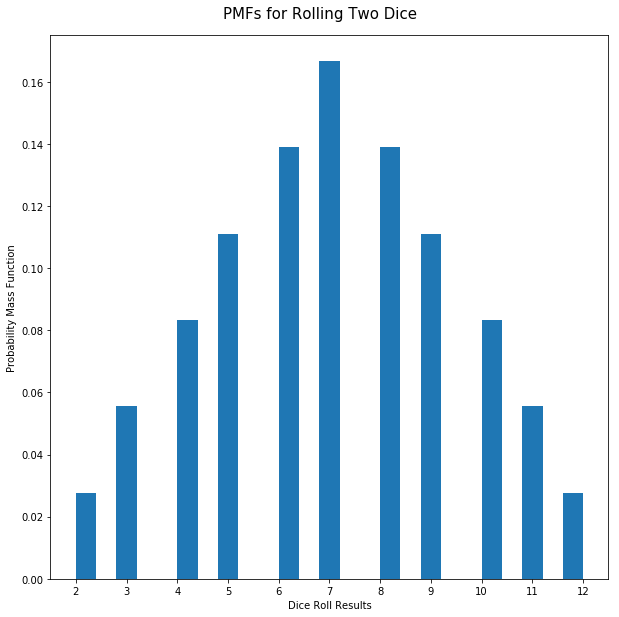

In [73]:
fig = plt.figure(figsize=(10,10))
plt.xticks(two_dice_unique)
plt.hist(two_dice_unique, weights=counts/np.sum(counts), bins=25)
plt.xlabel('Dice Roll Results')
plt.ylabel('Probability Mass Function')
fig.suptitle('PMFs for Rolling Two Dice', fontsize=15, y=0.92)

Text(0.5, 0.92, 'CDFs for Two Dice')

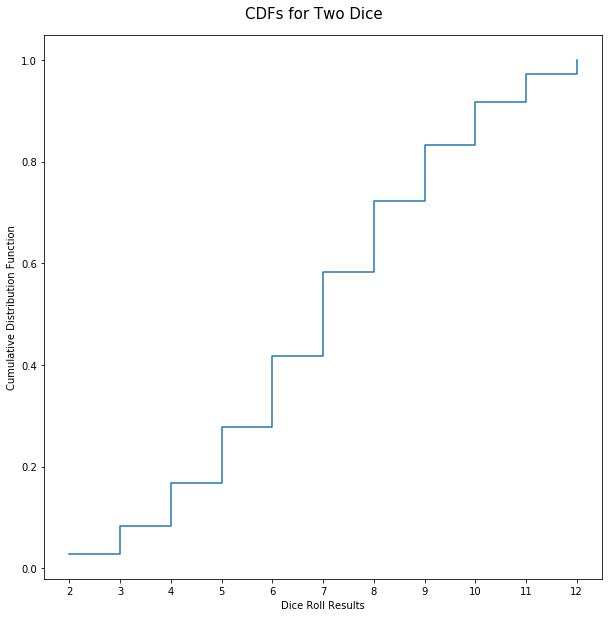

In [74]:
fig = plt.figure(figsize=(10,10))
plt.xticks(two_dice_unique)
plt.plot(two_dice_unique, np.cumsum(counts)/np.sum(counts),  drawstyle='steps-post', linestyle='-')
plt.xlabel('Dice Roll Results')
plt.ylabel('Cumulative Distribution Function')
fig.suptitle('CDFs for Two Dice', fontsize=15, y=0.92)